In [1]:
seirh = loadESL("models/seirh.easel")

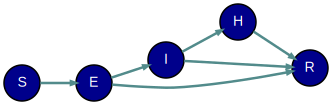

|Name|State/Param|Data Type|Value|
|---|---|---|---|
|beta|parameter|Real|0.8|
|delta|parameter|Real|1.0e-2|
|epsilon|parameter|Real|2.0e-2|
|gamma|parameter|Real|4.0e-2|
|kappa|parameter|Real|0.6|
|lambda|parameter|Real|0.2|
|E|state|Real|3.0|
|H|state|Real|0.0|
|I|state|Real|0.0|
|R|state|Real|0.0|
|S|state|Real|997.0|
|N|state|Real|S + I + H + E + R|

In [2]:
modelGraph(seirh)
describeModel(seirh)

In [3]:
times = [0..80 by 1]
seirh_sim = simulate(seirh at times)

In [4]:
seirh_sim_S_series = series(value(seirh_sim.S), "S (sim)", {{ style="lines"}})
seirh_sim_E_series = series(value(seirh_sim.E), "E (sim)", {{ style="lines"}})
seirh_sim_I_series = series(value(seirh_sim.I), "I (sim)", {{ style="lines"}})
seirh_sim_R_series = series(value(seirh_sim.R), "R (sim)", {{ style="lines"}})
seirh_sim_H_series = series(value(seirh_sim.H), "H (sim)", {{ style="lines"}})

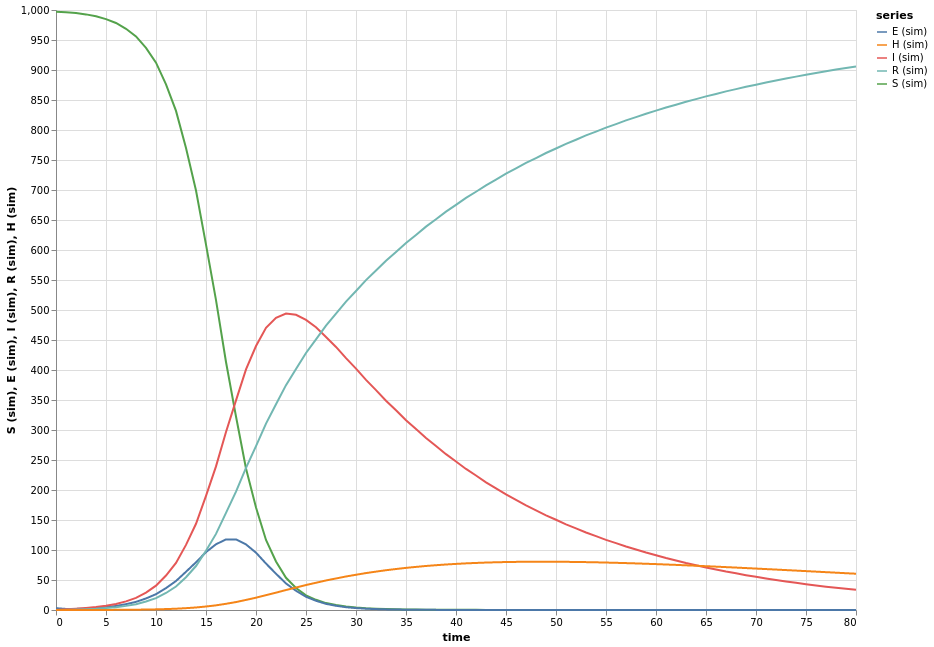

In [5]:
plot("seirh sim", [seirh_sim_S_series, seirh_sim_E_series, seirh_sim_I_series, seirh_sim_R_series, seirh_sim_H_series], time(seirh_sim), "time")

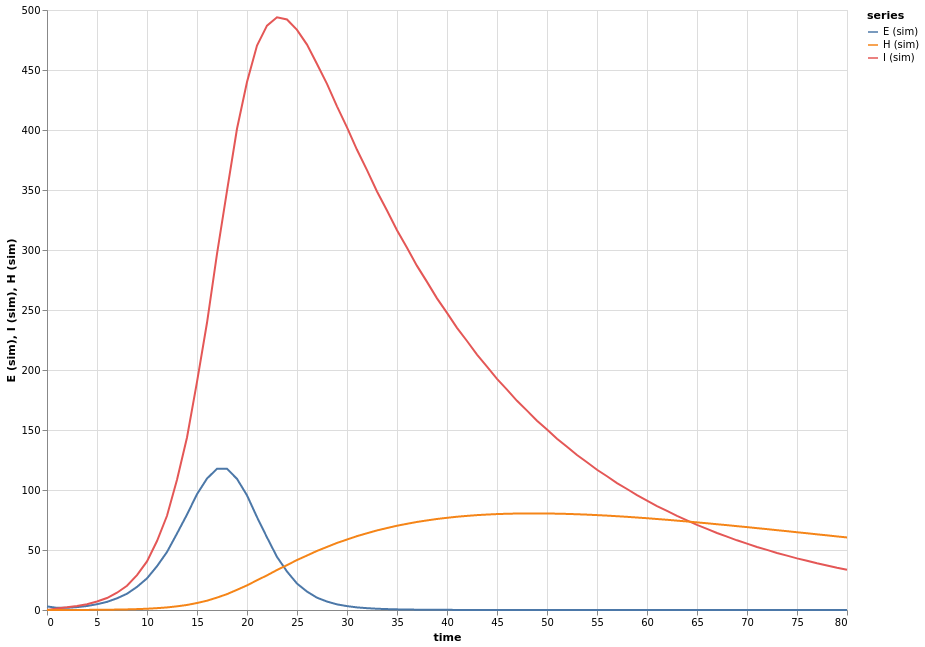

In [6]:
plot("seirh sim EIH", [seirh_sim_E_series, seirh_sim_I_series, seirh_sim_H_series], time(seirh_sim), "time")

In [7]:
seirh_samples = sample(seirh at times, 200)

In [10]:
seirh_I_max_series = series(value(max(seirh_samples.I)), "I (max)", {{ style = "lines" }})

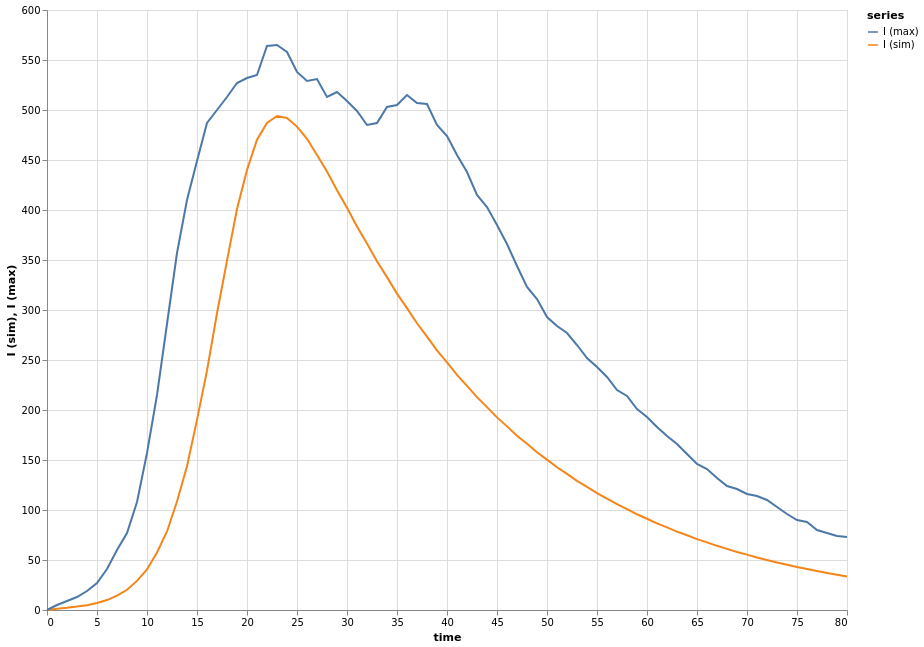

In [12]:
plot("seirh I sim vs. max", [seirh_sim_I_series, seirh_I_max_series], times, "time")

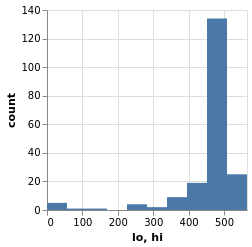

In [14]:
histogram(seirh_samples.I at 23, 10)

In [16]:
P(seirh_samples.I > 300 at 23)

0.945

In [18]:
peak_H_samples = sample(seirh at peak H over times, 200)

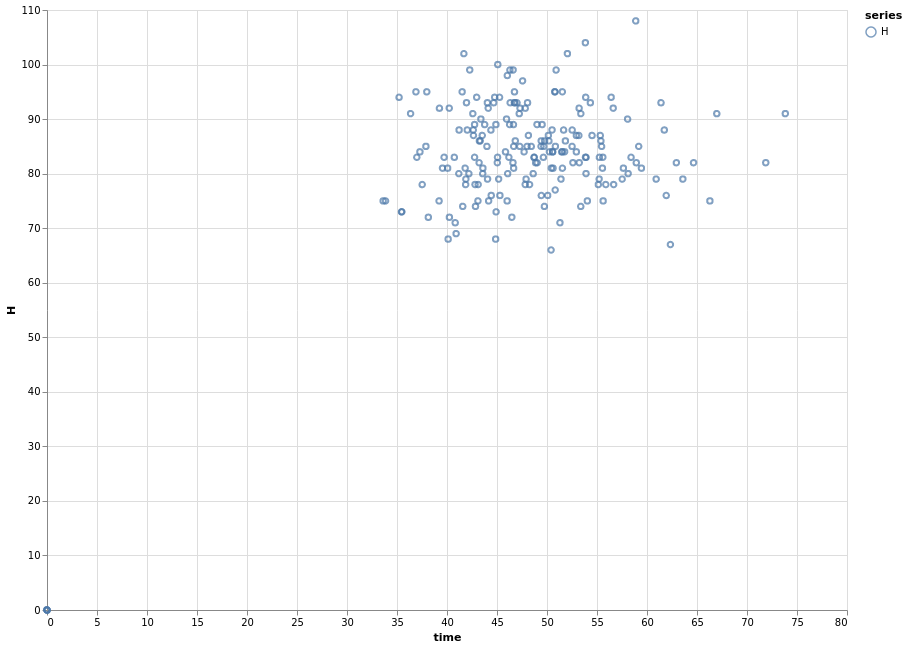

In [26]:
peak_H_series = series(value(peak_H_samples.H), "H", {{ style="points" }})
plot("H vs time", [peak_H_vals], time(peak_H_samples), "time")

In [29]:
max(value(peak_H_samples.H))

108

In [30]:
P(value(peak_H_samples.H) > 80)

0.695

In [31]:
P(time(peak_H_samples) > 45)

0.65